 ## Procedure
 
 1. Run grid set up with trial's step size
 2. save as step_'step size'_group.npy
 3. load here with correct x and y labels
 4. Add to graph
 5. Restart grid step up notebook kernel + repeat

In [13]:
import numpy as np
import matplotlib.pyplot as plt


x_values_p5,y_values_p5=np.load('step_p5_group.npy',allow_pickle=True) # eta 0.5 case

x_values_1,y_values_1=np.load('step_1_group.npy',allow_pickle=True) # eta 1 case

x_values_2,y_values_2=np.load('step_2_group.npy',allow_pickle=True) # eta 2 case

x_values_3,y_values_3=np.load('step_3_group.npy',allow_pickle=True) # eta 3 case

x_values_3p1,y_values_3p1=np.load('step_3p1_group.npy',allow_pickle=True) # eta 3.1 case

x_values_3p2,y_values_3p2=np.load('step_3p2_group.npy',allow_pickle=True) # eta 3.2 case

x_values_3p25,y_values_3p25=np.load('step_3p25_group.npy',allow_pickle=True) # eta 3.25 case

x_values_3p5,y_values_3p5=np.load('step_3p5_group.npy',allow_pickle=True) # eta 3.5 case

x_values_4,y_values_4=np.load('step_4_group.npy',allow_pickle=True) # eta 4 case

x_values_5,y_values_5=np.load('step_5_group.npy',allow_pickle=True) # eta 5 case




In [14]:
print(type(y_values_1))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Accuracy Data by learning step')

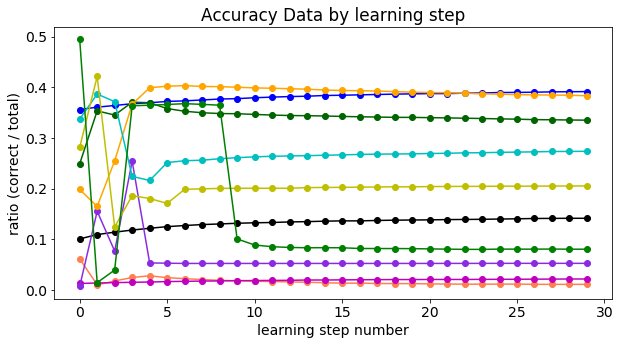

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x_values_p5,y_values_p5,color='coral',marker='o' ,linestyle='-' ,label="step = 0.5")
ax.plot(x_values_1,y_values_1,'mo-' ,label="step = 1")
ax.plot(x_values_2,y_values_2,'bo-' ,label="step = 2")
ax.plot(x_values_3,y_values_3,'ko-' ,label="step = 3")


ax.plot(x_values_3p1,y_values_3p1,color='darkgreen',marker='o' ,linestyle='-' ,label="step = 3.1")
ax.plot(x_values_3p2,y_values_3p2,color='blueviolet',marker='o' ,linestyle='-' ,label="step = 3.2")
ax.plot(x_values_3p25,y_values_3p25,color='orange',marker='o' ,linestyle='-' ,label="step = 3.25")
ax.plot(x_values_3p5,y_values_3p5,'co-' ,label="step = 3.5")

ax.plot(x_values_4,y_values_4,'yo-' ,label="step = 4")
ax.plot(x_values_5,y_values_5,'go-' ,label="step = 5")

ax.set_xlabel("learning step number")
ax.set_ylabel("ratio (correct / total)")
ax.set_title("Accuracy Data by learning step")
#fig.legend()


The above graph displays the initial and final accuracies for the network as a function of the learning step or iteration number, for each learning step size. The graph does not clearly show which step size is the best for training, so this data needs to be transformed.

In [16]:
#values_list=[y_values_1,y_values_2,y_values_3,y_values_4,y_values_5]



def count_convert(ratios,total_n):
    """This function takes the accuracy ratios as a list, as well as the number of test cases as parameters.
    ratios: list
    total_n: integer count of test cases
    
    The function returns a new list which is the change in the number of correct counts compared
    to the number the network had correctly characterized with random weights and biases."""
    counts=ratios*total_n
    max_value= np.amax(counts)
    
    counts_normalized = [value - max_value for value in counts]
    start=counts_normalized[0]
    counts_normalized = [value - start for value in counts_normalized]
    return counts_normalized


norm_p5= count_convert(y_values_p5,10000)
norm_1= count_convert(y_values_1,10000)
norm_2= count_convert(y_values_2,10000)
norm_3= count_convert(y_values_3,10000)
norm_3p5= count_convert(y_values_3p5,10000)
norm_3p1= count_convert(y_values_3p1,10000)
norm_3p2= count_convert(y_values_3p2,10000)
norm_3p25= count_convert(y_values_3p25,10000)
norm_4= count_convert(y_values_4,10000)
norm_5= count_convert(y_values_5,10000)

  
    


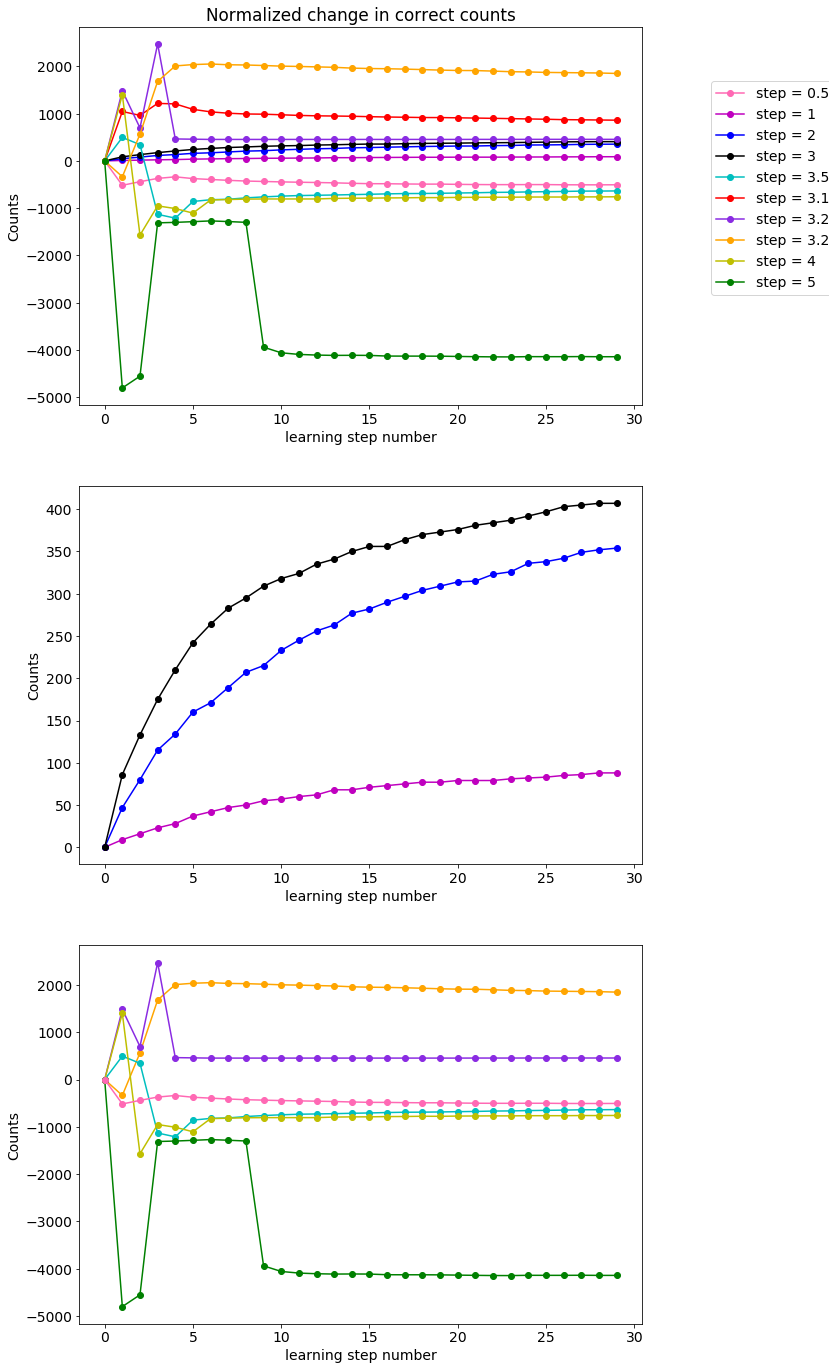

In [34]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(3,figsize=(10,20))

from matplotlib.ticker import StrMethodFormatter





#all data

ax[0].plot(x_values_p5,norm_p5,color='hotpink',marker='o' ,linestyle='-',label="step = 0.5   ")
ax[0].plot(x_values_1,norm_1,'mo-' ,label="step = 1   ")
ax[0].plot(x_values_2,norm_2,'bo-' ,label="step = 2   ")
ax[0].plot(x_values_3,norm_3,'ko-' ,label="step = 3   ")
ax[0].plot(x_values_3p5,norm_3p5,'co-' ,label="step = 3.5   ")
ax[0].plot(x_values_3p1,norm_3p1,color='red',marker='o' ,linestyle='-',label="step = 3.1   ")
ax[0].plot(x_values_3p2,norm_3p2,color='blueviolet',marker='o' ,linestyle='-',label="step = 3.2   ")
ax[0].plot(x_values_3p25,norm_3p25,color='orange',marker='o' ,linestyle='-',label="step = 3.25   ")
ax[0].plot(x_values_4,norm_4,'yo-' ,label="step = 4   ")
ax[0].plot(x_values_5,norm_5,'go-' ,label="step = 5   ")

ax[0].set_xlabel("learning step number")
ax[0].set_ylabel("Counts")
ax[0].set_title("Normalized change in correct counts")

fig.legend(bbox_to_anchor=[1.2, .9])

#sweet spot data
ax[1].plot(x_values_1,norm_1,'mo-')
ax[1].plot(x_values_2,norm_2,'bo-')
ax[1].plot(x_values_3,norm_3,'ko-')





ax[1].set_xlabel("learning step number")
ax[1].set_ylabel("Counts")


#wild data

ax[2].plot(x_values_3p25,norm_3p25,color='orange',marker='o' ,linestyle='-')
ax[2].plot(x_values_3p2,norm_3p2,color='blueviolet',marker='o' ,linestyle='-')
ax[2].plot(x_values_3p5,norm_3p5,'co-')
ax[2].plot(x_values_4,norm_4,'yo-' )
ax[2].plot(x_values_5,norm_5,'go-' )
ax[2].plot(x_values_p5,norm_p5,color='hotpink',marker='o' ,linestyle='-')

ax[2].set_xlabel("learning step number")
ax[2].set_ylabel("Counts")
fig.tight_layout(pad=3.0)








In the first sublot we can see different patterns emerge, which are fleshed out in the lower two subplots. In the bottom most subplot, the step size values outside of the step size range from 1-3 are plotted. There is initially a large fluctuation in values, which either plateus or gradually decreases with more training. 
In the second subplot for the learning step values between 1 and 3, initially the counts increase dramatically, and then the increase becomes less dramatic but continues. 
